## Import libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

## Import dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

Let's check the head and summary of our data.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There is no missing value. Let's see if there is anything we can do with the CustomerID columns.

In [5]:
len(df['CustomerID'])

200

In [6]:
df['CustomerID'].nunique()

200

We have 200 instances of customer and there are all unique. So, we can remove the columns.

In [7]:
df.drop('CustomerID',axis=1,inplace=True)

## EDA
Now let's do some exploratory data analysis.

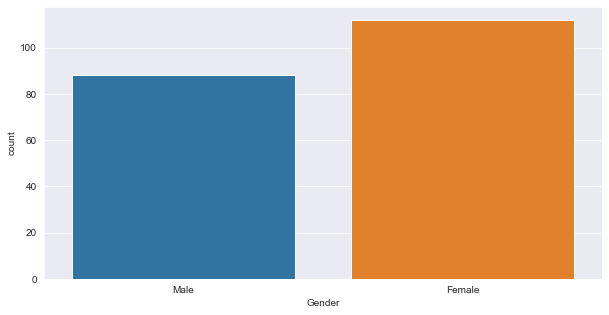

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'])

Number of female customers is a bit higher compare to number of male customers.

Text(0.5, 0, 'Age')

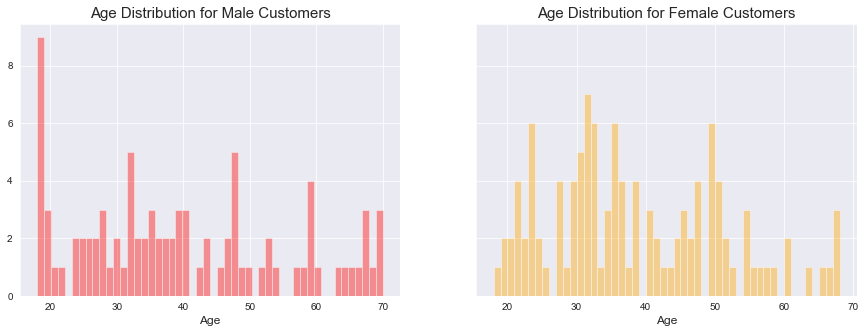

In [9]:
fig, ax =plt.subplots(1,2,figsize=(15,5),sharey=True)

sns.distplot(df[df['Gender']=='Male']['Age'],bins=50,kde=False, ax=ax[0],color='red')
ax[0].set_title('Age Distribution for Male Customers',fontsize=15)
ax[0].set_xlabel('Age',fontsize=12)

sns.distplot(df[df['Gender']=='Female']['Age'],bins=50,kde=False, ax=ax[1],color='orange')
ax[1].set_title('Age Distribution for Female Customers',fontsize=15)
ax[1].set_xlabel('Age',fontsize=12)

There are a lot of female customers around mid 20's, around 30 to 40, and late 40's. Meanwhile for male customers, we can clearly see that around the age of 17 to 20 has high number of customers.

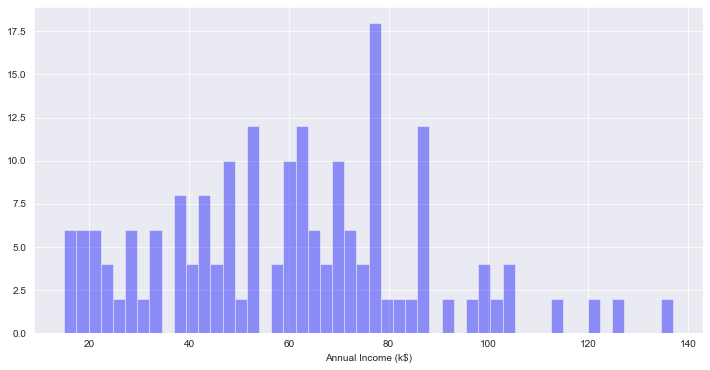

In [10]:
sns.distplot(df['Annual Income (k$)'],bins=50,kde=False,color='blue')

Most of our customers have annual income around 60k to 80k dollars. Let's see its relation with customers' spending score.

Text(0.5, 0, 'Spending Score (1-100)')

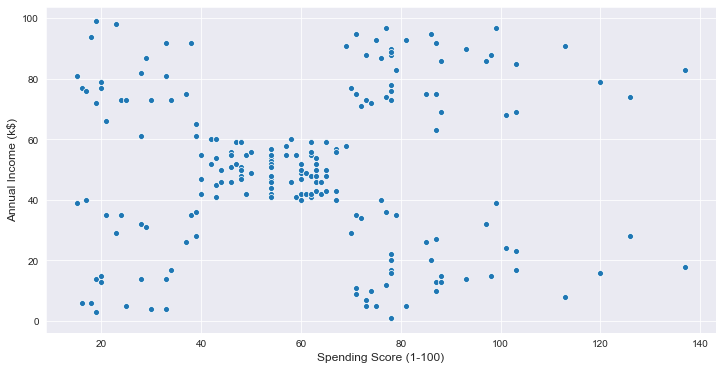

In [11]:
sns.scatterplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.xlabel('Spending Score (1-100)', fontsize=12)

Here, we can make a guess that there are a few clusters. Top left, top right, middle, bottom left, and bottom right. Let's do unsupervised learning to see how many clusters we have here. We will be using clustering.

## Building a K-Means Clustering model
Let's scale our data first.

In [12]:
feat = ['Annual Income (k$)','Spending Score (1-100)']

In [13]:
df_test = df[feat].copy()

In [14]:
df_test.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
df_scaled = scaler.fit_transform(df_test)

Next, let's create our model. We will be using the elbow method to find the most optimal number of clusters. We will be iterating the number of clusters from 1 to 10. Then, we will compute the sum of square distances from each point to its assigned cluster centers.

In [18]:
from sklearn.cluster import KMeans

In [19]:
wccs = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    wccs.append(kmeans.inertia_)

Text(0.5, 0, 'Number of Clusters')

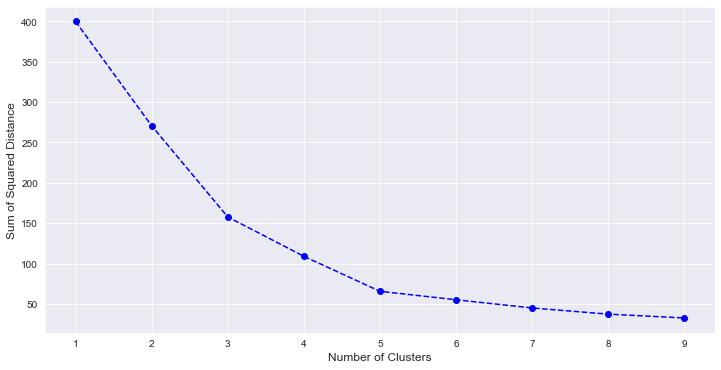

In [20]:
plt.plot(range(1,10),wccs, 'b--', marker='o')
plt.ylabel('Sum of Squared Distance', fontsize=12)
plt.xlabel('Number of Clusters', fontsize=12)

It can be clearly seen that 5 is the most optimal number of clusters. We'll be using it to find the label for each point.

In [21]:
kmeans = KMeans(n_clusters=5)

In [22]:
kmeans.fit(df_test)

KMeans(n_clusters=5)

In [23]:
label = kmeans.labels_

Text(0.5, 0, 'Spending Score (1-100)')

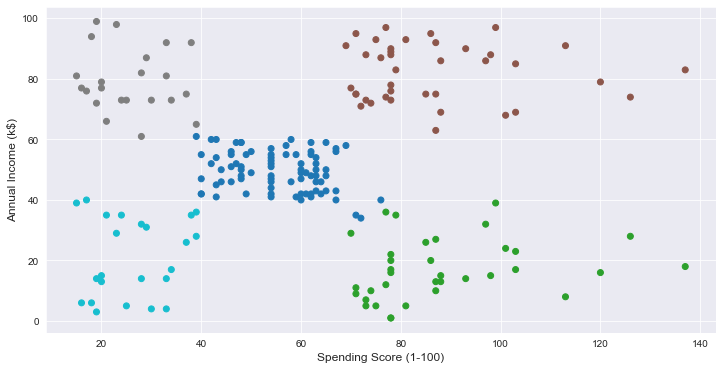

In [24]:
plt.scatter(df_test['Annual Income (k$)'], df_test['Spending Score (1-100)'], c=label, cmap='tab10')
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.xlabel('Spending Score (1-100)', fontsize=12)

The five clusters fit perfectly just like what we have guessed before. So, there are five types of customers based on their spending score and annual income.